## 0. Install Spotipy
We are installing the Spotipy library to use the Spotify Web API to better understand the recommendation algorithm and track data.

In [ ]:
!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 6.1 MB/s eta 0:00:00


##1. Import necessary packages
Obtain Client ID and Client Secret by creating a new app in the Spotify for Developers Dashboard and set any Redirect URL.

Since Google Colab is unable to open a tab for the redirect, it will ask the user to press a given URL and the user will paste the redirected URL into the input box.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyOAuth

cid = 'e28495d4504c486bb720eaf6c7f4d8b0'
secret = 'a7dc01c72df3431cbb23ecf0db40f131'
url = 'https://open.spotify.com/track/0LUgP4CrBbus8Yoq1C45pB?si=1ba6d5786b554fd3'

scope = "user-read-recently-played"

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=cid, client_secret= secret, redirect_uri=url, scope=scope, open_browser=False))


##2. Set track(s) to be used to generate playlist
The Track_id is the 22 characters following the https://open.spotify.com/track/ and before the ?.

e.g. For song https://open.spotify.com/track/0aOH62uqDzuvCvN2jdVtZs?si=66123f17123f4dfc

Track_id = 0aOH62uqDzuvCvN2jdVtZs

Track_name = Desafinado

Artist_name = Stan Getz, Charlie Byrd

In [ ]:
#track_id1 = '7m3zCiWcHVYsT630kPHcwr' # Influenza De Jazz by Herbie Mann Bossa Nova Example
track_id1 = '2RxDAFchouApF3yUwE6gxE' # See in Color Wax Motif, 220 KID House Example
#track_id1 = '6luBKkFUt5wTwz7hpLhp12' # R&B / Rap Example
#track_id1 = '7sdHMJvhKib3ReVPsZFbrf'
features_first = sp.audio_features([track_id1])
df_features_select = pd.DataFrame(features_first)
# Name and artist of song
df_features_select['track_name'] = ['Influenza De Jazz']
df_features_select['artist_name'] = ['Herbie Mann']

#track_id2 = '14eDJKiXvqPcO5MixCdXqx' # Kitana Ko Bossa Nova Example
track_id2 = '7pARbCUoO1CTzU5ucMEaVF' # Summer 91 Noizu House Example
#track_id2 = '0XJGSevJm70oos1HatS4JM' # R&B / Rap Example
#track_id2 = '23QyE9GQpXsX9WgEDADMa6'
features_second = sp.audio_features([track_id2])
df_features_second = pd.DataFrame(features_second)
# Name and artist of song
df_features_second['track_name'] = ['Kitana Ko']
df_features_second['artist_name'] = ['Baptiste Herbin']

df_features_combined = pd.concat([df_features_select, df_features_second]).reset_index(drop=True)
df_features_combined

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name,artist_name
0,0.76,0.807,10,-7.400,0,0.0501,0.14500,0.000486,0.102,0.476,127.017,audio_features,2RxDAFchouApF3yUwE6gxE,spotify:track:2RxDAFchouApF3yUwE6gxE,https://api.spotify.com/v1/tracks/2RxDAFchouAp...,https://api.spotify.com/v1/audio-analysis/2RxD...,158740,4,Influenza De Jazz,Herbie Mann
1,0.50,0.953,2,-5.606,1,0.0441,0.00598,0.000882,0.260,0.327,124.992,audio_features,7pARbCUoO1CTzU5ucMEaVF,spotify:track:7pARbCUoO1CTzU5ucMEaVF,https://api.spotify.com/v1/tracks/7pARbCUoO1CT...,https://api.spotify.com/v1/audio-analysis/7pAR...,149280,4,Kitana Ko,Baptiste Herbin


##3. Generate Recommendation List
The Get Recommendations function can be adjusted using the following.

Some of the inputs it can take includes:
- Artist seed
- Genre seed
- Track seed
- Market
- Limit (# of recommendations)

in addition to a target/min/max value all the audio properties

For this research's purpose, I will be examining the recommendation list using two tracks as the input.

In [ ]:
recommendations = sp.recommendations(seed_tracks=[track_id1, track_id2],limit=50) # limit is 50 in SpotifyAPI
# print(recommendations)
for idx, song in enumerate(recommendations['tracks']):
  print(f"{idx+1}. {song['name']} - {', '.join([artist['name'] for artist in song['artists']])}")

1. Flashing Lights - Subjoi
2. Wanna Be Down - Extended Mix - Karl Seery
3. Tell You Why - Edit - Route 94
4. Boomye - Hollaphonic
5. Last Time - Biscits Remix - Becky Hill, Biscits
6. The Calling (Roosterjaxx Remix) - Tchami, Marten Hørger, ROOSTERJAXX
7. Set You Free - Maur, FABER
8. Cody Was A Tank - DATSKO, Itani
9. Save Our Souls - Dombresky, Noizu
10. Drugs From Amsterdam - Mau P
11. Take Me Away - ACRAZE
12. Traga ft. STO Cultr - Wax Motif, STO CULTR
13. World, Hold On - FISHER Rework - Bob Sinclar, Steve Edwards, FISHER
14. Take Me - Martin Ikin, Joshwa
15. Policia - Gentlemens Club
16. Music Is The Answer (Dancin' & Prancin') - Danny Tenaglia, Celeda
17. Jungle (Funky Craig Remix) - Noizu, Funky Craig
18. Cut Me Loose - Jethro Heston, Cardboard Foxes, Max Marshall
19. One Chance (feat. Marlhy) - Knock2, NGHTMRE, Marlhy
20. Warrior - Austin Millz Remix - Aluna, SG Lewis, Austin Millz
21. Wake 'N' Shake - 220 KID, AR/CO
22. Space Jam (Noizu Remix) - Yolanda Be Cool, Noizu
23. Sa

In [ ]:
# Get a list of track IDs from the recommendations
track_ids = [track['id'] for track in recommendations['tracks']]

features_list = sp.audio_features(track_ids) # Fetch audio features for these tracks

df_features = pd.DataFrame(features_list) # Convert to DataFrame

# If you want to add track names and artist names to the DataFrame
df_features['track_name'] = [track['name'] for track in recommendations['tracks']]
df_features['artist_name'] = [', '.join([artist['name'] for artist in track['artists']]) for track in recommendations['tracks']]

# Display the DataFrame
df_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name,artist_name
0,0.721,0.868,7,-9.582,1,0.0907,0.42400,0.060700,0.1110,0.411,122.996,audio_features,4nUGTqmVL2z5Z6KHVU7pAx,spotify:track:4nUGTqmVL2z5Z6KHVU7pAx,https://api.spotify.com/v1/tracks/4nUGTqmVL2z5...,https://api.spotify.com/v1/audio-analysis/4nUG...,282733,4,Flashing Lights,Subjoi
1,0.930,0.902,11,-5.422,0,0.1620,0.01440,0.037100,0.0680,0.768,130.012,audio_features,6TvIbYr5swoPBxdPjDV14H,spotify:track:6TvIbYr5swoPBxdPjDV14H,https://api.spotify.com/v1/tracks/6TvIbYr5swoP...,https://api.spotify.com/v1/audio-analysis/6TvI...,230774,4,Wanna Be Down - Extended Mix,Karl Seery
2,0.802,0.642,6,-8.083,1,0.0497,0.00784,0.682000,0.1200,0.644,123.024,audio_features,39P4Y4k9YpVpjIG6hNSkEB,spotify:track:39P4Y4k9YpVpjIG6hNSkEB,https://api.spotify.com/v1/tracks/39P4Y4k9YpVp...,https://api.spotify.com/v1/audio-analysis/39P4...,173921,4,Tell You Why - Edit,Route 94
3,0.789,0.821,1,-5.857,1,0.0700,0.00489,0.808000,0.0709,0.518,126.006,audio_features,6PKdBNmb63iBVWjl8kr8Qc,spotify:track:6PKdBNmb63iBVWjl8kr8Qc,https://api.spotify.com/v1/tracks/6PKdBNmb63iB...,https://api.spotify.com/v1/audio-analysis/6PKd...,171375,4,Boomye,Hollaphonic
4,0.586,0.738,7,-6.332,0,0.0388,0.00248,0.000336,0.0637,0.122,123.992,audio_features,1vSgGwMtzSxz4VTYUMAfks,spotify:track:1vSgGwMtzSxz4VTYUMAfks,https://api.spotify.com/v1/tracks/1vSgGwMtzSxz...,https://api.spotify.com/v1/audio-analysis/1vSg...,215541,4,Last Time - Biscits Remix,"Becky Hill, Biscits"


##4. Combine Input Dataframe with Output Dataframes for Analysis

In [ ]:
result = pd.concat([df_features_combined, df_features]).reset_index(drop=True)
result.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,track_name,artist_name
0,0.760,0.807,10,-7.400,0,0.0501,0.14500,0.000486,0.102,0.476,127.017,audio_features,2RxDAFchouApF3yUwE6gxE,spotify:track:2RxDAFchouApF3yUwE6gxE,https://api.spotify.com/v1/tracks/2RxDAFchouAp...,https://api.spotify.com/v1/audio-analysis/2RxD...,158740,4,Influenza De Jazz,Herbie Mann
1,0.500,0.953,2,-5.606,1,0.0441,0.00598,0.000882,0.260,0.327,124.992,audio_features,7pARbCUoO1CTzU5ucMEaVF,spotify:track:7pARbCUoO1CTzU5ucMEaVF,https://api.spotify.com/v1/tracks/7pARbCUoO1CT...,https://api.spotify.com/v1/audio-analysis/7pAR...,149280,4,Kitana Ko,Baptiste Herbin
2,0.721,0.868,7,-9.582,1,0.0907,0.42400,0.060700,0.111,0.411,122.996,audio_features,4nUGTqmVL2z5Z6KHVU7pAx,spotify:track:4nUGTqmVL2z5Z6KHVU7pAx,https://api.spotify.com/v1/tracks/4nUGTqmVL2z5...,https://api.spotify.com/v1/audio-analysis/4nUG...,282733,4,Flashing Lights,Subjoi
3,0.930,0.902,11,-5.422,0,0.1620,0.01440,0.037100,0.068,0.768,130.012,audio_features,6TvIbYr5swoPBxdPjDV14H,spotify:track:6TvIbYr5swoPBxdPjDV14H,https://api.spotify.com/v1/tracks/6TvIbYr5swoP...,https://api.spotify.com/v1/audio-analysis/6TvI...,230774,4,Wanna Be Down - Extended Mix,Karl Seery
4,0.802,0.642,6,-8.083,1,0.0497,0.00784,0.682000,0.120,0.644,123.024,audio_features,39P4Y4k9YpVpjIG6hNSkEB,spotify:track:39P4Y4k9YpVpjIG6hNSkEB,https://api.spotify.com/v1/tracks/39P4Y4k9YpVp...,https://api.spotify.com/v1/audio-analysis/39P4...,173921,4,Tell You Why - Edit,Route 94


##5.1 Compare Audio Properties

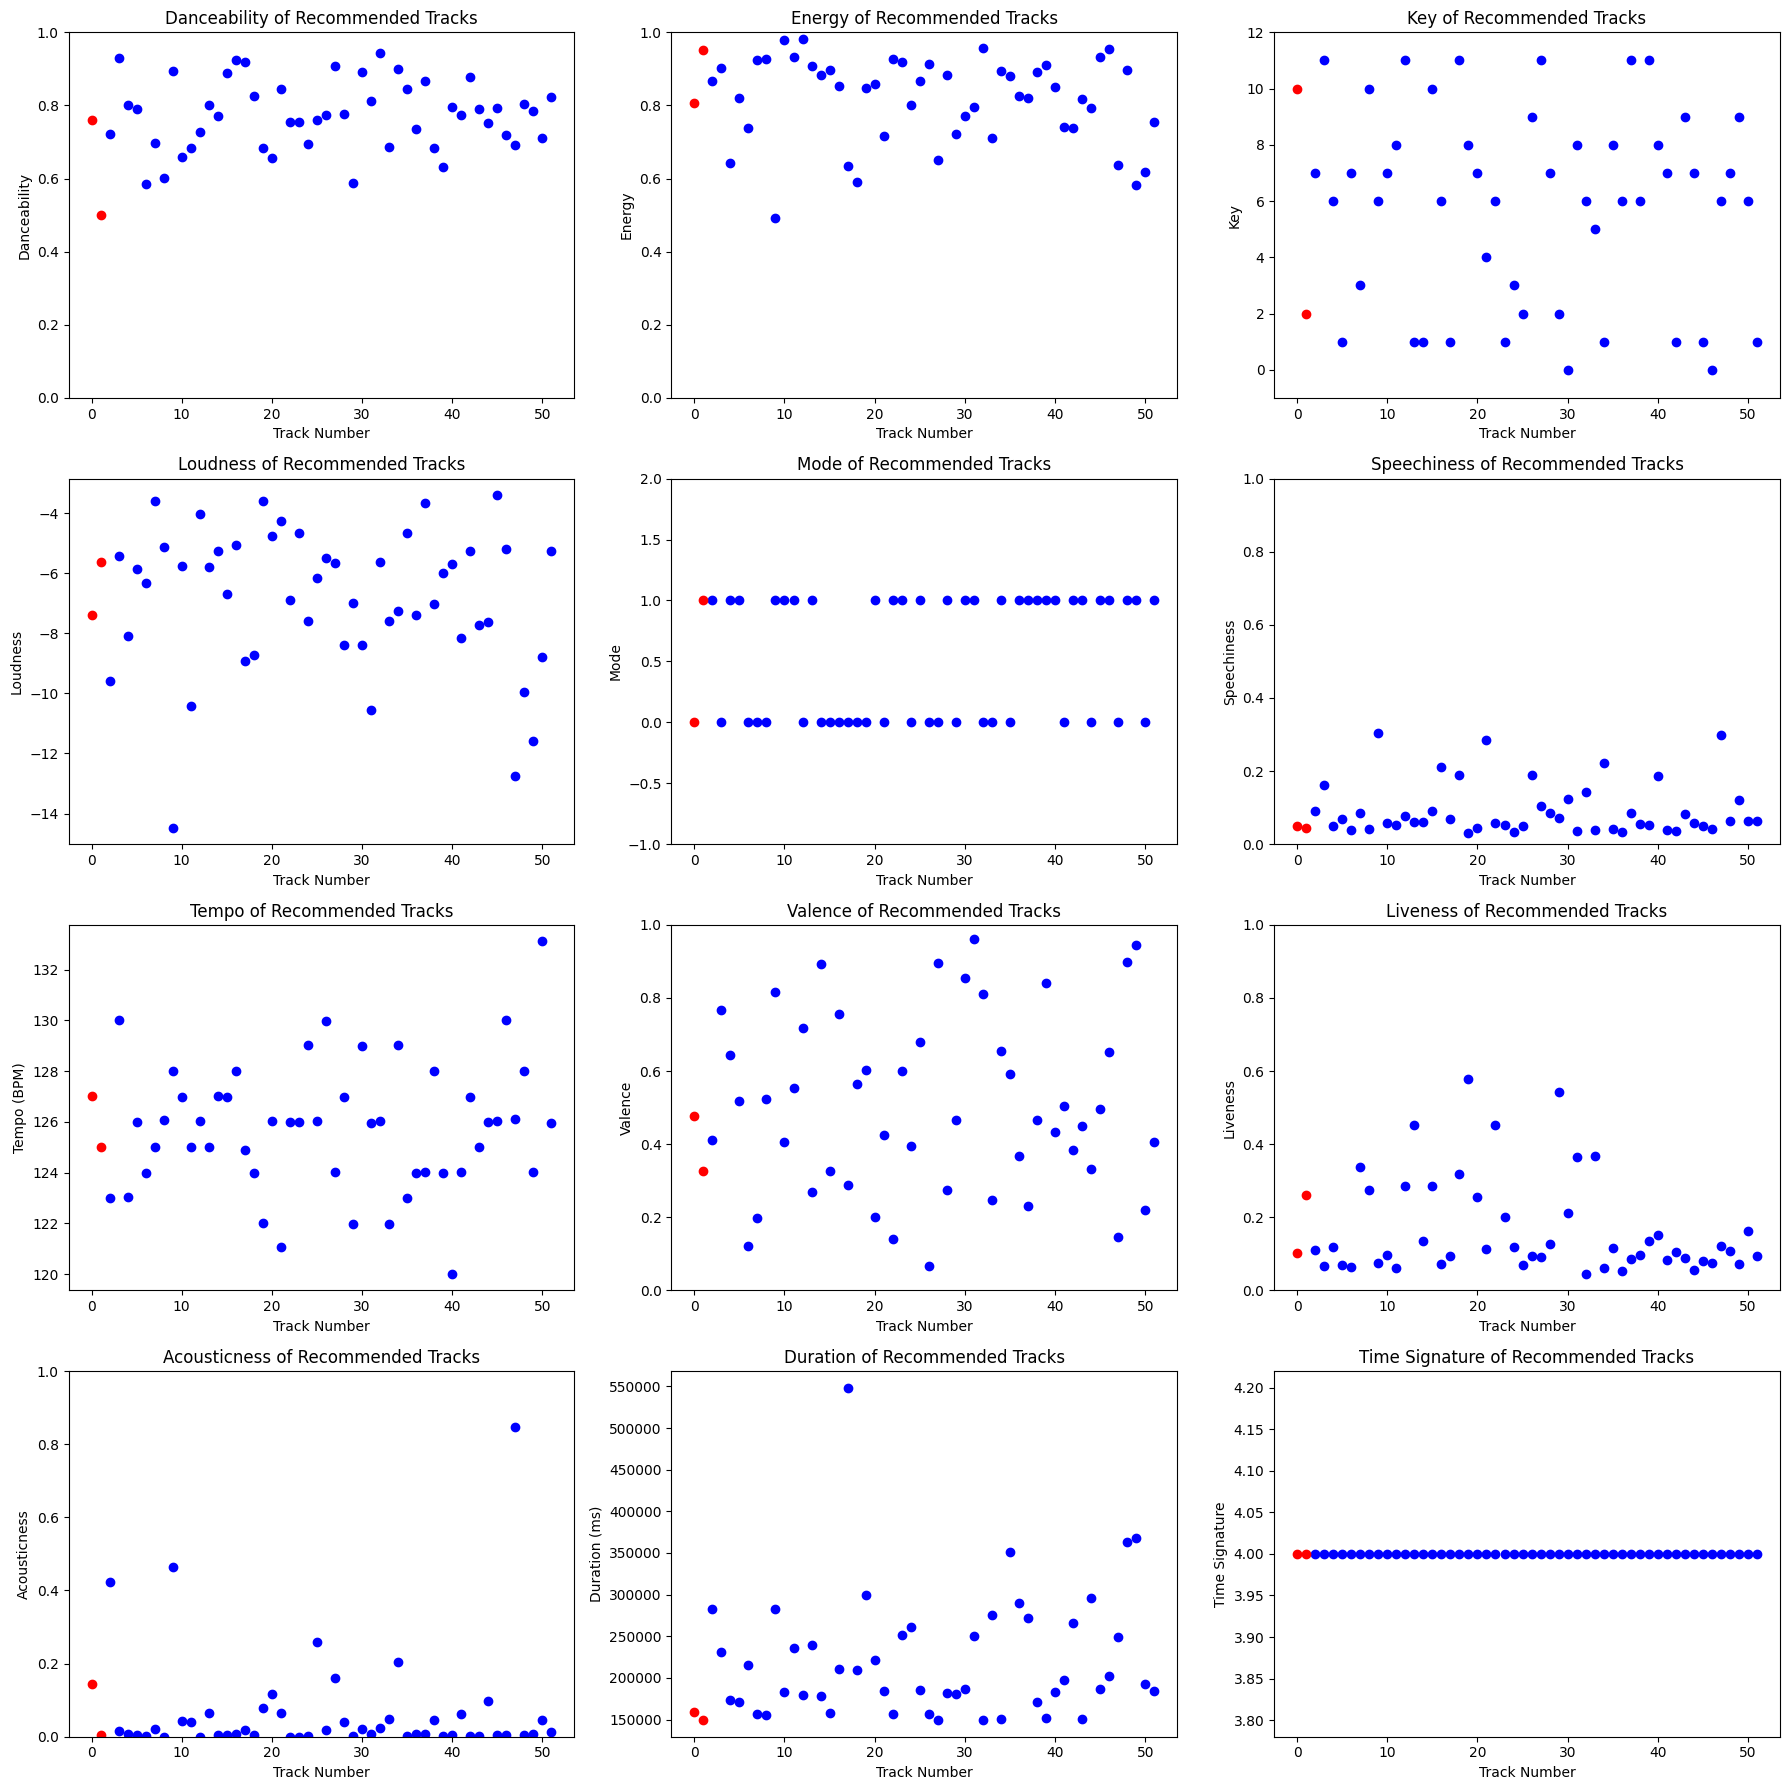

In [ ]:
x_values = result.index # Use index for x-axis

# Create a figure and a 1x2 array of subplots
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(18,18))

#---DANCEABILITY---#
ax[0,0].scatter(x_values[2:], result['danceability'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
ax[0,0].scatter(x_values[0:2], result['danceability'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
ax[0,0].set_ylim(0,1)
ax[0,0].set_xlabel('Track Number')
ax[0,0].set_ylabel('Danceability')
ax[0,0].set_title("Danceability of Recommended Tracks")

#---ENERGY---#
ax[0,1].scatter(x_values[2:], result['energy'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
ax[0,1].scatter(x_values[0:2], result['energy'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
ax[0,1].set_ylim(0,1)
ax[0,1].set_xlabel('Track Number')
ax[0,1].set_ylabel('Energy')
ax[0,1].set_title("Energy of Recommended Tracks")

#---KEY---#
ax[0,2].scatter(x_values[2:], result['key'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
ax[0,2].scatter(x_values[0:2], result['key'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
ax[0,2].set_ylim(-1,12)
ax[0,2].set_xlabel('Track Number')
ax[0,2].set_ylabel('Key')
ax[0,2].set_title("Key of Recommended Tracks")

#---LOUDNESS---#
ax[1,0].scatter(x_values[2:], result['loudness'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
ax[1,0].scatter(x_values[0:2], result['loudness'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
ax[1,0].set_xlabel('Track Number')
ax[1,0].set_ylabel('Loudness')
ax[1,0].set_title("Loudness of Recommended Tracks")

#---MODE---#
ax[1,1].scatter(x_values[2:], result['mode'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
ax[1,1].scatter(x_values[0:2], result['mode'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
ax[1,1].set_ylim(-1,2)
ax[1,1].set_xlabel('Track Number')
ax[1,1].set_ylabel('Mode')
ax[1,1].set_title("Mode of Recommended Tracks")

#---SPEECHINESS---#
ax[1,2].scatter(x_values[2:], result['speechiness'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
ax[1,2].scatter(x_values[0:2], result['speechiness'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
ax[1,2].set_ylim(0,1)
ax[1,2].set_xlabel('Track Number')
ax[1,2].set_ylabel('Speechiness')
ax[1,2].set_title("Speechiness of Recommended Tracks")

#---TEMPO---#
ax[2,0].scatter(x_values[2:], result['tempo'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
ax[2,0].scatter(x_values[0:2], result['tempo'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
ax[2,0].set_xlabel('Track Number')
ax[2,0].set_ylabel('Tempo (BPM)')
ax[2,0].set_title("Tempo of Recommended Tracks")

#---VALENCE---#
ax[2,1].scatter(x_values[2:], result['valence'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
ax[2,1].scatter(x_values[0:2], result['valence'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
ax[2,1].set_ylim(0,1)
ax[2,1].set_xlabel('Track Number')
ax[2,1].set_ylabel('Valence')
ax[2,1].set_title("Valence of Recommended Tracks")

#---LIVENESS---#
ax[2,2].scatter(x_values[2:], result['liveness'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
ax[2,2].scatter(x_values[0:2], result['liveness'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
ax[2,2].set_ylim(0,1)
ax[2,2].set_xlabel('Track Number')
ax[2,2].set_ylabel('Liveness')
ax[2,2].set_title("Liveness of Recommended Tracks")

#---ACOUSTICNESS---#
ax[3,0].scatter(x_values[2:], result['acousticness'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
ax[3,0].scatter(x_values[0:2], result['acousticness'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
ax[3,0].set_ylim(0,1)
ax[3,0].set_xlabel('Track Number')
ax[3,0].set_ylabel('Acousticness')
ax[3,0].set_title("Acousticness of Recommended Tracks")

#---DURATION---#
ax[3,1].scatter(x_values[2:], result['duration_ms'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
ax[3,1].scatter(x_values[0:2], result['duration_ms'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
ax[3,1].set_xlabel('Track Number')
ax[3,1].set_ylabel('Duration (ms)')
ax[3,1].set_title("Duration of Recommended Tracks")

#---TIME SIGNATURE---#
ax[3,2].scatter(x_values[2:], result['time_signature'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
ax[3,2].scatter(x_values[0:2], result['time_signature'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
ax[3,2].set_xlabel('Track Number')
ax[3,2].set_ylabel('Time Signature')
ax[3,2].set_title("Time Signature of Recommended Tracks")

plt.tight_layout()
plt.show()

###Scratch: Individual Plots

In [ ]:
# DANCEABILITY
#------FOR ONE INPUT SONG------#
# plt.scatter(x_values[1:], result['danceability'].iloc[1:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# plt.scatter(x_values[0], result['danceability'].iloc[0], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
#plt.xticks(ticks=x_values, labels=result['track_name'], rotation=45) # For song names

#------FOR TWO INPUT SONGS------#
# plt.scatter(x_values[2:], result['danceability'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# plt.scatter(x_values[0:2], result['danceability'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')

# plt.ylim(0,1)
# plt.xlabel('Track Number')
# plt.ylabel('Danceability')
# plt.title("Danceability of Recommended Tracks")
# plt.show()

In [ ]:
# ENERGY
#------FOR ONE INPUT SONG------#
# plt.scatter(x_values[1:], result['energy'].iloc[1:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# plt.scatter(x_values[0], result['energy'].iloc[0], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')

#------FOR TWO INPUT SONGS------#
# plt.scatter(x_values[2:], result['energy'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# plt.scatter(x_values[0:2], result['energy'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')

# plt.ylim(0,1)
# plt.xlabel('Track Number')
# plt.ylabel('Energy')
# plt.title("Energy of Recommended Tracks")
# plt.show()

In [ ]:
# KEY
#------FOR ONE INPUT SONG------#
# plt.scatter(x_values[1:], result['key'].iloc[1:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# plt.scatter(x_values[0], result['key'].iloc[0], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')

#------FOR TWO INPUT SONGS------#
# plt.scatter(x_values[2:], result['key'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# plt.scatter(x_values[0:2], result['key'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
# plt.ylim(-1,12)
# plt.xlabel('Track Number')
# plt.ylabel('Key')
# plt.title("Key of Recommended Tracks")
# plt.show()

In [ ]:
# LOUDNESS
#------FOR ONE INPUT SONG------#
# plt.scatter(x_values[1:], result['loudness'].iloc[1:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# plt.scatter(x_values[0], result['loudness'].iloc[0], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')

#------FOR TWO INPUT SONGS------#
# plt.scatter(x_values[2:], result['loudness'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# plt.scatter(x_values[0:2], result['loudness'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
# plt.xlabel('Track Number')
# plt.ylabel('Loudness')
# plt.title("Loudness of Recommended Tracks")
# plt.show()

In [ ]:
# MODE
#------FOR ONE INPUT SONG------#
# plt.scatter(x_values[1:], result['mode'].iloc[1:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# plt.scatter(x_values[0], result['mode'].iloc[0], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')

#------FOR TWO INPUT SONGS------#
# plt.scatter(x_values[2:], result['mode'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# plt.scatter(x_values[0:2], result['mode'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
# plt.ylim(-1,2)
# plt.xlabel('Track Number')
# plt.ylabel('Mode')
# plt.title("Mode of Recommended Tracks")
# plt.show()

In [ ]:
# SPEECHINESS
#------FOR ONE INPUT SONG------#
# plt.scatter(x_values[1:], result['speechiness'].iloc[1:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# plt.scatter(x_values[0], result['speechiness'].iloc[0], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')

#------FOR TWO INPUT SONGS------#
# plt.scatter(x_values[2:], result['speechiness'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# plt.scatter(x_values[0:2], result['speechiness'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
# plt.ylim(0,1)
# plt.xlabel('Track Number')
# plt.ylabel('Speechiness')
# plt.title("Speechiness of Recommended Tracks")
# plt.show()

In [ ]:
# TEMPO
#------FOR ONE INPUT SONG------#
# plt.scatter(x_values[1:], result['tempo'].iloc[1:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# plt.scatter(x_values[0], result['tempo'].iloc[0], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')

#------FOR TWO INPUT SONGS------#
# plt.scatter(x_values[2:], result['tempo'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# plt.scatter(x_values[0:2], result['tempo'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
# plt.xlabel('Track Number')
# plt.ylabel('Tempo (BPM)')
# plt.title("Tempo of Recommended Tracks")
# plt.show()

In [ ]:
# VALENCE
#------FOR ONE INPUT SONG------#
# plt.scatter(x_values[1:], result['valence'].iloc[1:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# plt.scatter(x_values[0], result['valence'].iloc[0], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')

#------FOR TWO INPUT SONGS------#
# plt.scatter(x_values[2:], result['valence'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# plt.scatter(x_values[0:2], result['valence'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
# plt.ylim(0,1)
# plt.xlabel('Track Number')
# plt.ylabel('Valence')
# plt.title("Valence of Recommended Tracks")
# plt.show()

In [ ]:
# LIVENESS
# #------FOR ONE INPUT SONG------#
# # plt.scatter(x_values[1:], result['liveness'].iloc[1:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# # plt.scatter(x_values[0], result['liveness'].iloc[0], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')

# #------FOR TWO INPUT SONGS------#
# plt.scatter(x_values[2:], result['liveness'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# plt.scatter(x_values[0:2], result['liveness'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
# plt.ylim(0,1)
# plt.xlabel('Track Number')
# plt.ylabel('Liveness')
# plt.title("Liveness of Recommended Tracks")
# plt.show()

In [ ]:
# ACOUSTICNESS
# #------FOR ONE INPUT SONG------#
# # plt.scatter(x_values[1:], result['acousticness'].iloc[1:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# # plt.scatter(x_values[0], result['acousticness'].iloc[0], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')

# #------FOR TWO INPUT SONGS------#
# plt.scatter(x_values[2:], result['acousticness'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# plt.scatter(x_values[0:2], result['acousticness'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
# plt.ylim(0,1)
# plt.xlabel('Track Number')
# plt.ylabel('Acousticness')
# plt.title("Acousticness of Recommended Tracks")
# plt.show()

In [ ]:
# DURATION
# #------FOR ONE INPUT SONG------#
# # plt.scatter(x_values[1:], result['duration_ms'].iloc[1:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# # plt.scatter(x_values[0], result['duration_ms'].iloc[0], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')

# #------FOR TWO INPUT SONGS------#
# plt.scatter(x_values[2:], result['duration_ms'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# plt.scatter(x_values[0:2], result['duration_ms'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
# plt.xlabel('Track Number')
# plt.ylabel('Duration (ms)')
# plt.title("Duration of Recommended Tracks")
# plt.show()

In [ ]:
# TIME SIGNATURE
# #------FOR ONE INPUT SONG------#
# # plt.scatter(x_values[1:], result['time_signature'].iloc[1:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# # plt.scatter(x_values[0], result['time_signature'].iloc[0], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')

# #------FOR TWO INPUT SONGS------#
# plt.scatter(x_values[2:], result['time_signature'].iloc[2:], color='blue', label='Tracks') # Plot all points except the first one with a certain color (e.g., 'blue')
# plt.scatter(x_values[0:2], result['time_signature'].iloc[0:2], color='red', label='First Track') # Plot the first point with a different color (e.g., 'red')
# plt.xlabel('Track Number')
# plt.ylabel('Time Signature')
# plt.title("Time Signature of Recommended Tracks")
# plt.show()